In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as auc

In [2]:

data_train_tag = pd.read_csv('./训练数据集1/训练数据集_tag.csv')
data_train_trd = pd.read_csv('./训练数据集1/训练数据集_trd.csv')
data_train_beh = pd.read_csv('./训练数据集1/训练数据集_beh.csv')

test_tag = pd.read_csv('./评分数据集1/评分数据集_tag.csv')
test_trd = pd.read_csv('./评分数据集1/评分数据集_trd.csv')
test_beh = pd.read_csv('./评分数据集1/评分数据集_beh.csv')


In [3]:
# beh训练集
user_pgTimes = pd.DataFrame(data_train_beh.id.value_counts())
user_pgTimes['index'] = user_pgTimes.index
user_pgTimes.index = range(len(user_pgTimes))
user_pgTimes.columns = ['pg_times', 'user']
user_pgTimes = user_pgTimes[['user', 'pg_times']]

In [4]:
# beh测试集
test_user_pgTimes = pd.DataFrame(test_beh.id.value_counts())
test_user_pgTimes['index'] = test_user_pgTimes.index
test_user_pgTimes.index = range(len(test_user_pgTimes))
test_user_pgTimes.columns = ['pg_times', 'user']
test_user_pgTimes = test_user_pgTimes[['user', 'pg_times']]
test_user_pgTimes.shape

(1844, 2)

### 对tag表进行处理


In [5]:
data_train_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
id                                 39923 non-null object
flag                               39923 non-null int64
gdr_cd                             39923 non-null object
age                                39923 non-null int64
mrg_situ_cd                        39923 non-null object
edu_deg_cd                         27487 non-null object
acdm_deg_cd                        39922 non-null object
deg_cd                             18960 non-null object
job_year                           39923 non-null object
ic_ind                             39923 non-null object
fr_or_sh_ind                       39923 non-null object
dnl_mbl_bnk_ind                    39923 non-null object
dnl_bind_cmb_lif_ind               39923 non-null object
hav_car_grp_ind                    39923 non-null object
hav_hou_grp_ind                    39923 non-null object
l6mon_agn_ind                      399

In [22]:
# 用众数填补缺失值
data_train_tag_1 = data_train_tag.copy()
data_train_tag_1.atdd_type.fillna(data_train_tag_1.atdd_type.mode()[0], inplace=True)
data_train_tag_1.acdm_deg_cd.fillna(data_train_tag_1.acdm_deg_cd.mode()[0], inplace=True)
data_train_tag_1.edu_deg_cd.fillna(data_train_tag_1.edu_deg_cd.mode()[0], inplace=True)
data_train_tag_1.deg_cd.fillna(data_train_tag_1.deg_cd.mode()[0], inplace=True)

In [23]:
# 用训练集众数 填补测试集缺失值
test_tag_1 = test_tag.copy()
test_tag_1.atdd_type.fillna(data_train_tag_1.atdd_type.mode()[0], inplace=True)
test_tag_1.acdm_deg_cd.fillna(data_train_tag_1.acdm_deg_cd.mode()[0], inplace=True)
test_tag_1.edu_deg_cd.fillna(data_train_tag_1.edu_deg_cd.mode()[0], inplace=True)
test_tag_1.deg_cd.fillna(data_train_tag_1.deg_cd.mode()[0], inplace=True)

In [24]:
categorical_cols = data_train_tag_1.select_dtypes(include='object').columns
categorical_cols

Index(['id', 'gdr_cd', 'mrg_situ_cd', 'edu_deg_cd', 'acdm_deg_cd', 'deg_cd',
       'job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
       'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind',
       'fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd',
       'cust_inv_rsk_endu_lvl_cd', 'tot_ast_lvl_cd', 'pot_ast_lvl_cd',
       'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
       'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms', 'loan_act_ind',
       'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day', 'hld_crd_card_grd_cd',
       'crd_card_act_ind', 'l1y_crd_card_csm_amt_dlm_cd', 'atdd_type'],
      dtype='object')

In [25]:
# 对category'/N'用众数填充
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values = r'\N', strategy='most_frequent')
imp_mode = imp_mode.fit(data_train_tag_1.loc[:, categorical_cols[1:]])
data_train_tag_1.loc[:, categorical_cols[1:]] = imp_mode.transform(data_train_tag_1.loc[:, categorical_cols[1:]])


In [26]:
test_tag_1.loc[:, categorical_cols[1:]] = imp_mode.transform(test_tag_1.loc[:, categorical_cols[1:]])

**要将训练集测试集拼接来进行编码和类型转换**

In [96]:
test_tag_1.atdd_type.value_counts()

0      3502
0.0    2332
1.0     166
Name: atdd_type, dtype: int64

In [131]:
type(data_train_tag_1.atdd_type[0])

str

In [132]:
# 对上述进行处理
test_tag_1.atdd_type = test_tag_1.atdd_type.astype(str)

In [136]:
data = pd.concat([data_train_tag_1, test_tag_1], ignore_index=True, sort=False)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45923 entries, 0 to 45922
Data columns (total 43 columns):
id                                 45923 non-null object
flag                               39923 non-null float64
gdr_cd                             45923 non-null object
age                                45923 non-null int64
mrg_situ_cd                        45923 non-null object
edu_deg_cd                         45923 non-null object
acdm_deg_cd                        45923 non-null object
deg_cd                             45923 non-null object
job_year                           45923 non-null object
ic_ind                             45923 non-null object
fr_or_sh_ind                       45923 non-null object
dnl_mbl_bnk_ind                    45923 non-null object
dnl_bind_cmb_lif_ind               45923 non-null object
hav_car_grp_ind                    45923 non-null object
hav_hou_grp_ind                    45923 non-null object
l6mon_agn_ind                      4

In [138]:
data.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0.0,M,41,B,B,Z,~,3,0,...,-1,0,0,0,3,1,0,3492,-1,10
1,U557810,0.0,M,35,A,F,G,~,4,0,...,-1,0,0,0,1,1,0,4575,-1,10
2,U1E9240,0.0,M,53,B,A,C,C,9,0,...,-1,0,0,0,7,2,0,4894,-1,40
3,U6DED00,0.0,F,41,B,F,Z,~,0,0,...,-1,0,0,0,1,1,0,4938,-1,10
4,UDA8E28,0.0,F,42,B,B,Z,B,3,1,...,-1,0,0,0,2,7,0,2378,-1,20


In [139]:
# 将部分category转换为数值类型
categorical_num = ['hld_crd_card_grd_cd','l1y_crd_card_csm_amt_dlm_cd','job_year', 'frs_agn_dt_cnt','fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd',
 'cust_inv_rsk_endu_lvl_cd', 'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'l12mon_buy_fin_mng_whl_tms',
       'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
       'l12_mon_gld_buy_whl_tms', 'ovd_30d_loan_tot_cnt',
       'his_lng_ovd_day']
categorical_ind = [x for x in categorical_cols if x not in categorical_num]

In [140]:
categorical_ind

['id',
 'gdr_cd',
 'mrg_situ_cd',
 'edu_deg_cd',
 'acdm_deg_cd',
 'deg_cd',
 'ic_ind',
 'fr_or_sh_ind',
 'dnl_mbl_bnk_ind',
 'dnl_bind_cmb_lif_ind',
 'hav_car_grp_ind',
 'hav_hou_grp_ind',
 'l6mon_agn_ind',
 'vld_rsk_ases_ind',
 'loan_act_ind',
 'crd_card_act_ind',
 'atdd_type']

In [141]:
data.loc[:, categorical_num] = data.loc[:, categorical_num].astype(int)

In [142]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder().fit(data.loc[:, categorical_ind[1:]])
data.loc[:, categorical_ind[1:]] = oe.transform(data.loc[:, categorical_ind[1:]])   

In [159]:
(data.iloc[:len(data_train_tag_1),:].id == data_train_tag_1.id).sum()

39923

In [163]:
a = data.iloc[len(data_train_tag_1):, :].id.copy()
a.index = np.arange(len(a))

In [164]:
(a == test_tag_1.id).sum()

6000

In [165]:
train_tag = data.iloc[:len(data_train_tag_1),:]

In [172]:
test_tag = data.iloc[len(data_train_tag_1):, :]
test_tag.index = np.arange(len(test_tag))

In [174]:
test_tag.drop(['flag'], axis=1, inplace=True)

/home/esterl/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [175]:
test_tag

,id,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,UC37930,0.0,39,1.0,2.0,1.0,5.0,0,0.0,0.0,...,20,1.0,4,0.0,6,3,4,4378,683,20
1,U5BE130,0.0,40,1.0,10.0,6.0,5.0,1,0.0,0.0,...,10,0.0,1,0.0,2,1,1,1078,1637,10
2,UD025AE,0.0,48,1.0,2.0,1.0,0.0,0,0.0,1.0,...,30,1.0,5,0.0,7,5,3,6361,4809,20
3,UC2D00D,1.0,47,1.0,0.0,6.0,2.0,0,0.0,1.0,...,10,1.0,5,0.0,7,8,3,8032,5447,40
4,UAF705D,0.0,36,1.0,1.0,0.0,5.0,2,0.0,0.0,...,20,1.0,5,0.0,8,4,2,5885,1748,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,U71611F,1.0,49,1.0,4.0,5.0,5.0,7,0.0,0.0,...,20,1.0,3,1.0,4,1,1,2102,2063,10
5996,U52CFE4,1.0,36,0.0,4.0,5.0,5.0,0,0.0,1.0,...,10,1.0,3,0.0,6,1,1,1799,1741,20
5997,U6A5425,1.0,28,1.0,2.0,1.0,5.0,2,0.0,0.0,...,10,1.0,4,0.0,3,1,1,438,438,10
5998,UB8871F,1.0,31,0.0,10.0,6.0,5.0,3,0.0,0.0,...,10,1.0,3,0.0,2,1,1,597,586,10


## 拼接所有表格

In [187]:
del(train_trd)

In [194]:
# 读取trd表
train_trd = pd.read_csv('./训练数据集1/train_use_trd.csv')
test_trd = pd.read_csv('./评分数据集1/train_use_trd.csv')

In [195]:
test_trd

,user,trd_times,total_count,B_out,C_in,out_count,in_count
0,U712783,4861,-6711.07,25,1,488005.59,481294.52
1,U9EF083,1836,356904.56,19,149,4044394.56,4401299.12
2,U60405F,1257,-13440.31,14,5,3079613.19,3066172.88
3,U70EBFD,1093,8623.13,84,0,1251960.31,1260583.44
4,UA94395,1014,2442.08,3,0,1208216.04,1210658.12
...,...,...,...,...,...,...,...
4782,U61693B,1,0.07,0,0,0.00,0.07
4783,U54B80C,1,2.58,0,0,0.00,2.58
4784,U9241B9,1,0.09,0,0,0.00,0.09
4785,U6EBA82,1,34.80,1,0,0.00,34.80


In [196]:
train_trd

,user,trd_times,total_count,B_out,C_in,out_count,in_count
0,UBD9C48,5836,2173.69,5693,143,962039.77,964213.46
1,U8AE05B,2589,-19.04,1232,1357,3354162.49,3354143.45
2,U0015B2,2490,-13241.21,1535,955,1966131.73,1952890.52
3,U9E0C0D,2392,4145.88,1117,1275,3940858.61,3945004.49
4,U7EF7EC,2237,-1990.99,2063,174,342173.63,340182.64
...,...,...,...,...,...,...,...
31988,U0FB42D,1,4.80,0,1,0.00,4.80
31989,U802EEF,1,0.04,0,1,0.00,0.04
31990,U0E3E25,1,-120.00,1,0,120.00,0.00
31991,U74C352,1,0.06,0,1,0.00,0.06


In [197]:
train_data = pd.merge(train_tag, train_trd, how='left', left_on='id', right_on='user')
train_data.drop(['user'], axis=1, inplace=True)
train_data.shape

(39923, 49)

In [198]:
train_data = pd.merge(train_data, user_pgTimes, how='left', left_on='id', right_on='user')
train_data.drop(['user'], axis=1, inplace=True)
train_data.shape

(39923, 50)

In [199]:
test_data = pd.merge(test_tag, test_trd, how='left', left_on='id', right_on='user')
test_data.drop(['user'], axis=1, inplace=True)
test_data.shape

(6000, 48)

In [200]:
test_data = pd.merge(test_data, test_user_pgTimes, how='left', left_on='id', right_on='user')
test_data.drop(['user'], axis=1, inplace=True)
test_data.shape

(6000, 49)

In [203]:
# 对pgTime进行填充
train_data.pg_times.fillna(train_data.pg_times.mode()[0], inplace=True)
test_data.pg_times.fillna(train_data.pg_times.mode()[0], inplace=True)

In [204]:
train_data.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,trd_times,total_count,B_out,C_in,out_count,in_count,pg_times
0,U7A4BAD,0.0,1.0,41,1.0,1.0,6.0,5.0,3,0.0,...,3492,-1,10,3.0,2400.00,1.0,2.0,15000.00,17400.00,1.0
1,U557810,0.0,1.0,35,0.0,4.0,5.0,5.0,4,0.0,...,4575,-1,10,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,U1E9240,0.0,1.0,53,1.0,0.0,2.0,2.0,9,0.0,...,4894,-1,40,17.0,-25439.96,6.0,11.0,131158.00,105718.04,35.0
3,U6DED00,0.0,0.0,41,1.0,4.0,6.0,5.0,0,0.0,...,4938,-1,10,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,UDA8E28,0.0,0.0,42,1.0,1.0,6.0,1.0,3,1.0,...,2378,-1,20,18.0,9089.51,5.0,13.0,70416.04,79505.55,22.0


## 建模分析

In [206]:
train_data_ = train_data.copy()
X, y = train_data_.iloc[:,2:], train_data_['flag']

In [209]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [210]:
import xgboost as xgb

In [212]:
dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest, Ytest)
dfull = xgb.DMatrix(X,y)

In [213]:
from time import time
import datetime

In [215]:
(y==1).sum()/len(y)

0.22425669413621221

00:21:757185
00:15:384563
00:19:237429


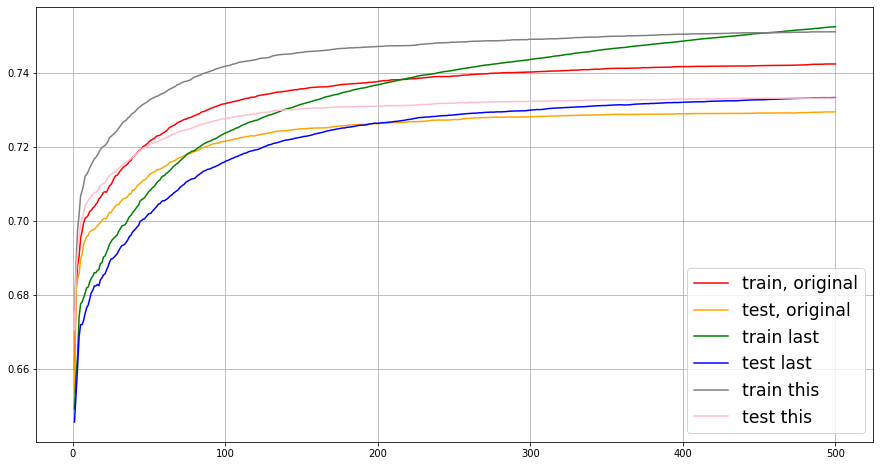

In [288]:
param1 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 100,
         'gamma': 30,
         'subsample': 0.5,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 1,
         'eta': 0.05,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':5}
num_round = 500

time0 = time()
cvResult = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig, ax = plt.subplots(1,figsize=(15,8))
ax.grid()
ax.plot(range(1,(num_round+1)), cvResult.iloc[:,0], c='r', label='train, original')
ax.plot(range(1,(num_round+1)), cvResult.iloc[:,2], c='orange', label='test, original')

param2 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 2,
         'lambda': 100,
         'gamma':0,
         'subsample': 0.75,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.75,
         'colsample_bynode': 0.75,
         'min_child_weight': 1,
         'eta': 0.05,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':10}
param3 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 4,
         'lambda': 100,
         'gamma':30,
         'subsample': 0.75,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 1,
         'eta': 0.05,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':5}
time0 = time()
cvResult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvResult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,(num_round+1)), cvResult2.iloc[:,0], c='green', label='train last')
ax.plot(range(1,(num_round+1)), cvResult2.iloc[:,2], c='blue', label='test last')


ax.plot(range(1,(num_round+1)), cvResult3.iloc[:,0], c='grey', label='train this')
ax.plot(range(1,(num_round+1)), cvResult3.iloc[:,2], c='pink', label='test this')
ax.legend(fontsize='xx-large')
# plt.yticks([0.7,0.75,0.8])
plt.show()

In [217]:
cvResult

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.687930,0.004195,0.677270,0.008513
1,0.699340,0.005106,0.688569,0.007093
2,0.708088,0.003485,0.695439,0.007740
3,0.718880,0.006008,0.705113,0.005417
4,0.724682,0.005824,0.708834,0.006058
...,...,...,...,...
495,0.943589,0.001807,0.720223,0.004631
496,0.943695,0.001860,0.720092,0.004633
497,0.943832,0.001823,0.720065,0.004626
498,0.943998,0.001793,0.720096,0.004502


In [285]:
params = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 4,
         'lambda': 100,
         'gamma':30,
         'subsample': 0.75,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 1,
         'eta': 0.06,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':5}
num_round = 500

In [286]:
bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)

In [287]:
roc_auc_score(Ytest, preds)

0.7345978379256494

In [268]:
bst = xgb.train(params, dtrain, num_round)

In [269]:
import joblib

joblib.dump(bst, './训练数据集1/xgboost-fintech-joblib_1.dat')

['./训练数据集1/xgboost-fintech-joblib_1.dat']

In [272]:
loaded_model_joblib = joblib.load('./训练数据集1/xgboost-fintech-joblib_1.dat')
preds = loaded_model_joblib.predict(dtest)

auc(Ytest, preds)

0.7323679237062644

In [273]:
data_test_ = test_data.copy()

In [274]:
test_data_feature = data_test_.drop(['id'], axis=1)
user_id = data_test_['id']
test_data_feature.shape

(6000, 48)

In [275]:
dtest_a = xgb.DMatrix(test_data_feature)

In [276]:
data_test_['preds'] = loaded_model_joblib.predict(dtest_a)

In [277]:
output_a = data_test_.loc[:,['id', 'preds']]

In [278]:
output_a.to_csv('./训练数据集1/submit_a_1.txt', sep='\t', index=False, encoding='utf8')

In [290]:
from xgboost import plot_importance

<Figure size 1440x7200 with 0 Axes>

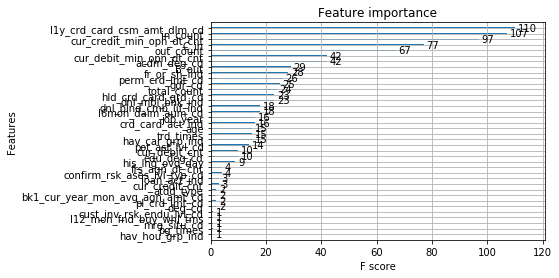

In [296]:
fig = plt.figure(figsize=(20, 100))
plot_importance(loaded_model_joblib)
plt.show()


In [293]:
importace = loaded_model_joblib.get_fscore

In [310]:
test_data.C_in.value_counts()

0.0      4442
1.0       111
2.0        92
3.0        43
4.0        21
5.0        16
7.0        12
6.0        10
11.0        3
18.0        3
8.0         3
14.0        2
56.0        2
13.0        2
9.0         2
15.0        2
27.0        2
25.0        2
16.0        2
71.0        1
96.0        1
55.0        1
36.0        1
20.0        1
12.0        1
26.0        1
51.0        1
149.0       1
17.0        1
47.0        1
19.0        1
31.0        1
63.0        1
10.0        1
Name: C_in, dtype: int64